In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warning

In [25]:
#reading in the data
test_data = pd.read_csv('aug_test.csv')
train_data = pd.read_csv('aug_train.csv')
target = train_data['target']
train_data = train_data.drop(['target'],axis=1)

# Understanding the data

#### From the data it is clear that there are some NAN values within the data for some columns. We will have to fill the values and perform 

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


##### The categorical_labels in the next cell signifies the categorical data and now we can plot the graphs

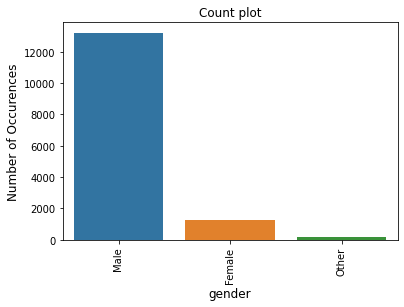

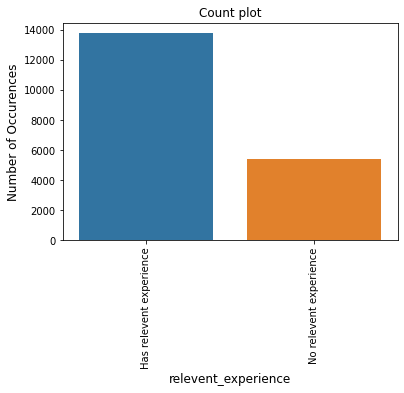

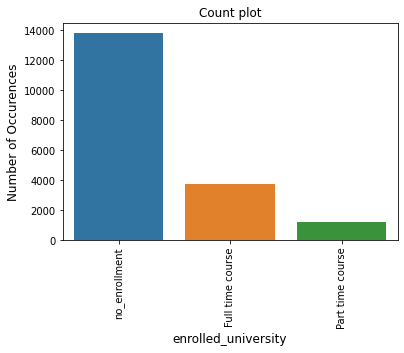

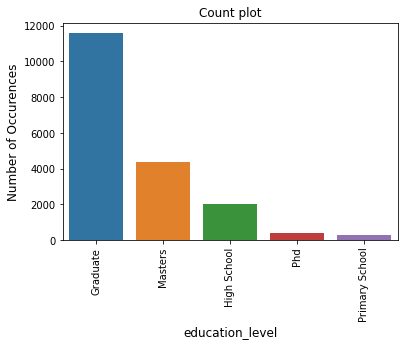

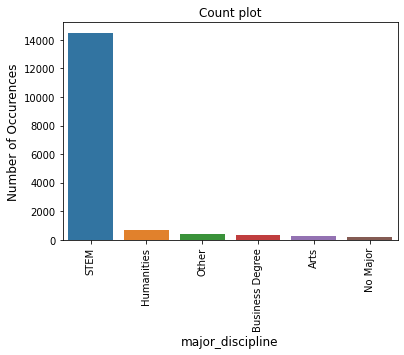

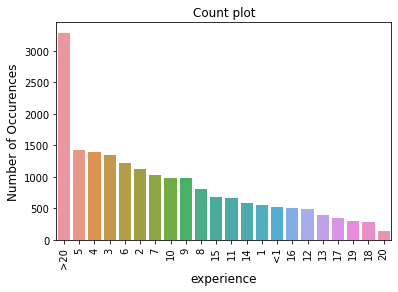

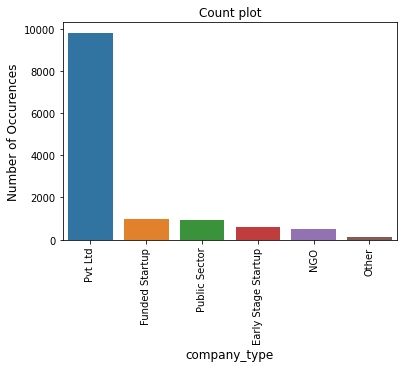

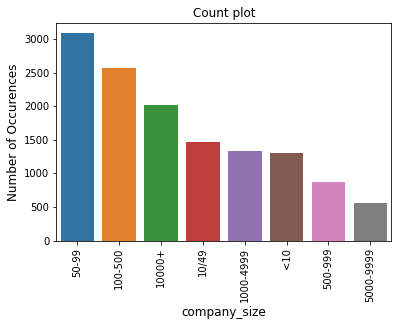

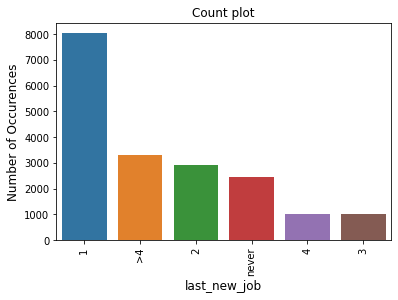

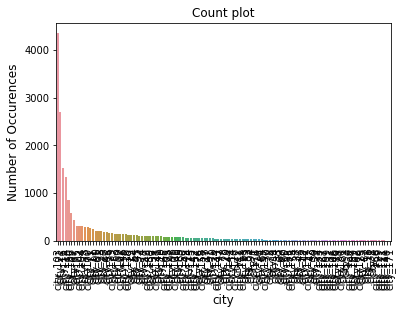

In [47]:
from warnings import filterwarnings 
filterwarnings('ignore')
categorical_labels = ['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type','company_size','last_new_job','city']
def plot(labels,data,label_present = True):
    if label_present:
        for i in labels:
            graph_data = data[i].value_counts()  
            sns.barplot(graph_data.index, graph_data.values, alpha=1)
            plt.ylabel('Number of Occurences', fontsize=12)
            plt.xlabel(i, fontsize=12)
            plt.xticks(rotation=90)
            plt.title('Count plot')
            plt.show()
    else:
        graph_data = data.value_counts()  
        sns.barplot(graph_data.index, graph_data.values, alpha=1)
        plt.ylabel('Number of Occurences', fontsize=12)
        plt.xlabel(labels, fontsize=12)
        plt.xticks(rotation=90)
        plt.title('Count plot')
        plt.show()
        
plot(categorical_labels,train_data)

#### Plotting the Targets to see what the data distribution looks like

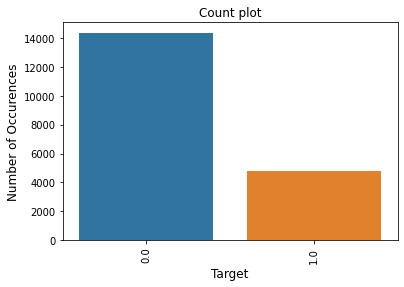

In [48]:
plot('Target',target,False)

We can observe from the above graph that the data is not uniformly distributed.

# Preprocessing
### Categorical data to Numerical data

In [13]:
#changing categorical data to numeric data
def categorical_data_to_numeric(data,cat_target):
    for col in data.columns:
        if col in cat_target:
            col_data = data[col]
            col_data_norm = pd.factorize(col_data)[0]
            data[col] = col_data_norm
        data = data.replace(-1,np.nan)
    return data


train_data = categorical_data_to_numeric(train_data,categorical_labels)
print("After Categorical to Numeric:")
display(train_data)


After Categorical to Numeric:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0,0.920,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,36
1,29725,1,0.776,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,47
2,11561,2,0.624,NaN,1,1.0,0.0,0.0,2.0,NaN,NaN,2.0,83
3,33241,3,0.789,NaN,1,NaN,0.0,1.0,3.0,NaN,0.0,2.0,52
4,666,4,0.767,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,0.0,1,0.0,0.0,3.0,13.0,NaN,NaN,0.0,42
19154,31398,0,0.920,0.0,0,0.0,0.0,0.0,13.0,NaN,NaN,3.0,52
19155,24576,0,0.920,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,44
19156,5756,33,0.802,0.0,0,0.0,2.0,NaN,3.0,7.0,0.0,5.0,97


## Filling any NaN values with the mean 

In [14]:
print("Before Fill NA: Any missing sample in training set:",train_data.isnull().values.any())
def fill_na(data):
    for col in data.columns:
        data[col] = data[col].fillna((data[col].mean()))
    return data
train_data = fill_na(train_data)
print("After Fill NA: Any missing sample in training set:",train_data.isnull().values.any())

Before Fill NA: Any missing sample in training set: True
After Fill NA: Any missing sample in training set: False


### Splitting the data into test and train

In [49]:
#randomly splitting the data into test and train
X_train,X_test,Y_train, Y_test = train_test_split(train_data,target,random_state=42) 